### Assignment 1: Implementing k-means Clustering
Student Name: Qichun Yu <br>
Student Id: 0361980

In [1]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, silhouette_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.spatial.distance import cdist
import math
np.random.seed(0)

%matplotlib inline

1. Using NumPy or the math package and the Euclidean distance formula, write a function that calculates the distance between two coordinates.

In [2]:
# Create a naive formula for the math of Euclidean distance
def euclidean_dist(a, b):
    return math.sqrt(math.pow(a[0]-b[0], 2) + math.pow(a[1]-b[1],2))

In [3]:
# Create the data points in Python
centroids = [ (2,5), (8,3), (4,5) ]
x = (0,8)

# Calculating Euclidean Distance between x and centroid
for centroid in centroids:
    print("Euclidean Distance between x {} and centroid {} is {}".format(x , centroid, euclidean_dist(x, centroid)))

Euclidean Distance between x (0, 8) and centroid (2, 5) is 3.605551275463989
Euclidean Distance between x (0, 8) and centroid (8, 3) is 9.433981132056603
Euclidean Distance between x (0, 8) and centroid (4, 5) is 5.0


2. Using NumPy or the math package and the Manhattan distance formula, write a function that calculates the distance between two coordinates.

In [4]:
# Create a naive formula for the math of Manhattan distance
def manhattan_dist(a, b):
    return abs(a[0]-b[0]) + abs(a[1]-b[1])

In [5]:
# Calculating  Manhattan Distance between x and centroid
for centroid in centroids:
    print("Manhattan Distance between x {} and centroid {} is {}".format(x , centroid,  manhattan_dist(x, centroid)))

Manhattan Distance between x (0, 8) and centroid (2, 5) is 5
Manhattan Distance between x (0, 8) and centroid (8, 3) is 13
Manhattan Distance between x (0, 8) and centroid (4, 5) is 7


3. Use the "cdist" function from numpy to write code that calculates the distance from the centroids to each of the points in your dataset and returns the cluster membership. This function should take in the choice of distance metric (Euclidean or Manhattan) as a parameter. You can use the built-in cdist function, and do not need to use your functions from questions 1 and 2.

In [6]:
centroids = np.array(centroids)
x = np.array(x).reshape([1,-1])

In [7]:
def dist(X, CENTROIDS, metric):
    if metric.lower() == 'manhattan':
        calcs = cdist(X, CENTROIDS, metric='cityblock') #'cityblock' is the same metric as 'manhattan'
    else:
        calcs = cdist(X, CENTROIDS, metric=metric.lower())
        
    cluster_membership = np.argmin(cdist) # return the index of the minimum
    return "{} Distance:{} Cluster Membership: {}".format(metric.title(), calcs.squeeze(),cluster_membership)

print(dist(x, centroids, metric='euclidean'))
print(dist(x, centroids, metric='manhattan')) 

Euclidean Distance:[3.60555128 9.43398113 5.        ] Cluster Membership: 0
Manhattan Distance:[ 5. 13.  7.] Cluster Membership: 0


4. Write a k-means function that takes in a dataset and the number of clusters (K) and returns the final cluster centroids, as well as the data points that make up that cluster's membership. This function should take in the choice of distance metric (Euclidean or Manhattan) as a parameter.

In [8]:
def k_means(X, K, dist_metric):
    # Empty list to keep track of history to see K-Means in action
    centroids_history = []
    labels_history = []
    
    # Randomly initialize Kcentroids
    rand_index = np.random.choice(X.shape[0], K)  
    centroids = X[rand_index]
    #print(centroids)
    centroids_history.append(centroids)
    #print(cdist(X,centroids))
    
    # While loop repeats process until difference between new centroids = old centroids 
    while True:
        # np.argmin returns the index location of the minimal distance
        labels = np.argmin(cdist(X, centroids, metric=dist_metric), axis=1)
        labels_history.append(labels)
        
        # Take mean of points within clusters to find new centroids
        new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(K)])
        centroids_history.append(new_centroids)
        
        # If old centroids and new centroids no longer change, K-Means is complete and end. Otherwise continue
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids
    
    return centroids, labels, centroids_history, labels_history

5. Apply your custom algorithm to the seeds dataset, which is attached to the assignment dropbox.

In [9]:
seeds = pd.read_csv('Seed_Data.csv')

In [10]:
seeds.head()

,A,P,C,LK,WK,A_Coef,LKG,target
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,0


6. Remove the classes supplied in this dataset. Generate a plot to check k-means algorithm can group the different wheat species into their proper groups just based on plant characteristics, and provide comments about how well it does.

In [11]:
X = seeds[['A','P','C','LK','WK','A_Coef','LKG']]


In [12]:
X.head()

,A,P,C,LK,WK,A_Coef,LKG
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175


In [13]:
# Convert from Pandas dataframe to NumPy matrix
X_mat = X.values
# Run our Seeds matrix through the k_means function we created earlier
centroids, labels, centroids_history, labels_history = k_means(X_mat, 3, 'euclidean')
print(centroids)
print(labels)
#print(centroids_history)
#print(labels_history)

[[11.98865854 13.28439024  0.85273659  5.22742683  2.88008537  4.58392683
   5.0742439 ]
 [14.81910448 14.53716418  0.88052239  5.59101493  3.29935821  2.70658507
   5.21753731]
 [18.72180328 16.29737705  0.88508689  6.20893443  3.72267213  3.60359016
   6.06609836]]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1
 2 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 1 1 1 1 1 0 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 1 2 1 2 2 2 2 2 2 2 1 1 1 1 2 1 1 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


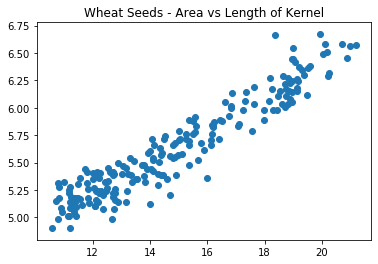

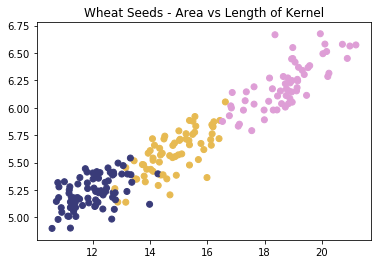

In [14]:
# See how well our implementation of K-Means did

plt.scatter(X['A'], X['LK'])
plt.title('Wheat Seeds - Area vs Length of Kernel')
plt.show()

plt.scatter(X['A'], X['LK'], c=labels, cmap='tab20b')
plt.title('Wheat Seeds - Area vs Length of Kernel')
plt.show()

When we plot the scatter plot with the Area and Length of Kernel features, we can see that the k-mean function divides the data points into three cluster groups. When compared with the area and length of kernel features, the three groups are:1) area larger than 16.5 and length of kernel longer than 5.8, 2) area between 13 to 16.5 and length of kernel between 5.1 to 6, 3) smaller than 14 and length of kernel shorter than 5.5. Three clusters can almost clearly classify between these two features.  

7. Describe how the silhouette score is calculated and explain what this metric reveals about a model. Calculate the silhouette score using the scikit-learn implementation.

In [15]:
# Calculate Silhouette Score

silhouette_score(X[['A','LK']], labels)

0.5875704550892767

The silhouette score is a metric that evaluates how well the data points fit in their clusters. Simplified Silhouette Index = (bi-ai)/(max(ai, bi)), where ai is the distance from data point i to its own cluster centroid and bi is the distance from point i to the nearest cluster centroid. The metric is always between -1 to 1 and it is very good when it is close to 1. It is on a border when the value is 0 and the metric performance is bad when it is close to -1. The silhouette score is the average of all simplified silhouette indexes over all of the points. When we calculate the silhouette Score between the Area and length of kernel features, the score is about 0.5876, which is good. 

### Compare with other features

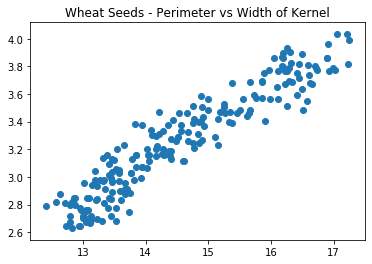

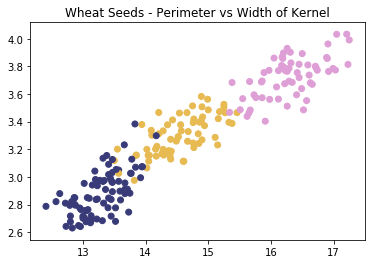

In [16]:
# See how well our implementation of K-Means did

plt.scatter(X['P'], X['WK'])
plt.title('Wheat Seeds - Perimeter vs Width of Kernel')
plt.show()

plt.scatter(X['P'], X['WK'], c=labels, cmap='tab20b')
plt.title('Wheat Seeds - Perimeter vs Width of Kernel')
plt.show()

In [17]:
silhouette_score(X[['P','WK']], labels)

0.5608476396129136

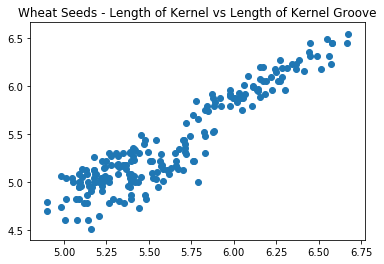

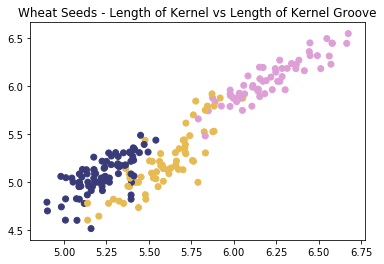

In [18]:
# See how well our implementation of K-Means did

plt.scatter(X['LK'], X['LKG'])
plt.title('Wheat Seeds - Length of Kernel vs Length of Kernel Groove')
plt.show()

plt.scatter(X['LK'], X['LKG'], c=labels, cmap='tab20b')
plt.title('Wheat Seeds - Length of Kernel vs Length of Kernel Groove')
plt.show()

In [19]:
silhouette_score(X[['LK','LKG']], labels)

0.3530638651013589

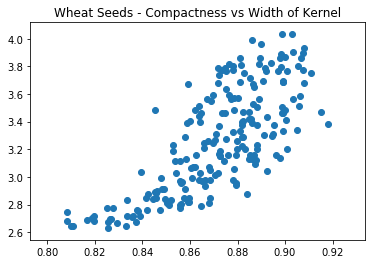

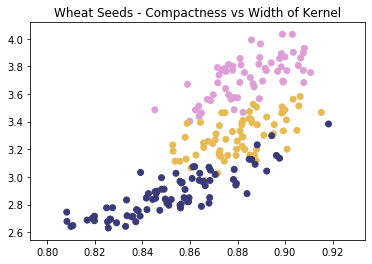

In [20]:
# See how well our implementation of K-Means did

plt.scatter(X['C'], X['WK'])
plt.title('Wheat Seeds - Compactness vs Width of Kernel')
plt.show()

plt.scatter(X['C'], X['WK'], c=labels, cmap='tab20b')
plt.title('Wheat Seeds - Compactness vs Width of Kernel')
plt.show()

In [21]:
silhouette_score(X[['C','WK']], labels)

0.4736251788321524

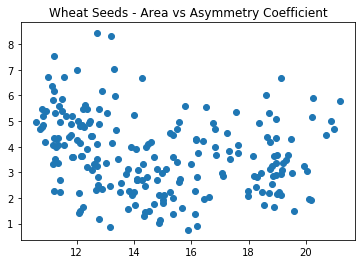

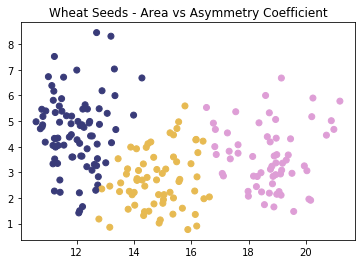

In [22]:
# See how well our implementation of K-Means did

plt.scatter(X['A'], X['A_Coef'])
plt.title('Wheat Seeds - Area vs Asymmetry Coefficient')
plt.show()

plt.scatter(X['A'], X['A_Coef'], c=labels, cmap='tab20b')
plt.title('Wheat Seeds - Area vs Asymmetry Coefficient')
plt.show()

In [23]:
silhouette_score(X[['A','A_Coef']], labels)

0.4612370788947245

From the plot above, we can see that the k-mean cluster is doing great when classifying the points into three groups. The silhouette_score is all positive and indicates the model is doing well. 